# Exploratory Data Analysis (EDA)

In this notebook, we will conduct an exploratory data analysis (EDA) to gain an initial understanding of our dataset. The analysis begins by reviewing the structure of the data, including the number of rows, columns, and data types, followed by a look into summary statistics to understand central tendencies and variations. We will explore the distribution of numerical and categorical features, visualizing them to identify patterns, skewness, and any potential outliers. A correlation analysis will be performed to examine relationships between numerical features, and we will also identify any missing values to inform suitable imputation strategies. Finally, box plots will be used to detect outliers in the dataset, allowing us to address any anomalies before further analysis.


#### 1.Overview of the data 

In [2]:
import pandas as pd 
# Load the dataset 
df = pd.read_csv("../notebooks/data/data.csv")

# Overview of the data
num_rows, num_columns = df.shape
data_types = df.dtypes

# Display the overview
print(f"Number of Rows: {num_rows}")
print(f"Number of COlumns: {num_columns}")
print("\nData Types of Each Column:")
print(data_types)

Number of Rows: 95662
Number of COlumns: 16

Data Types of Each Column:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


#### 2. Summary statistics


In [3]:
import numpy as np
import pandas as pd

# Summary statistics for numerical columns
numerical_summary = df.describe(include=[np.number])

# Summary statistics for categorical (object) columns
categorical_summary = df.describe(include=[object])

# Display numerical summary
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

# Display categorical summary
print("\nSummary Statistics for Categorical Columns:")
print(categorical_summary)

# Additional details for categorical columns (optional)
for column in df.select_dtypes(include=[object]).columns:
    print(f"\nStatistics for {column}:")
    print(df[column].value_counts())

Summary Statistics for Numerical Columns:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Summary Statistics for Categorical Columns:
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_356

#### 3. Distribution of numerical values

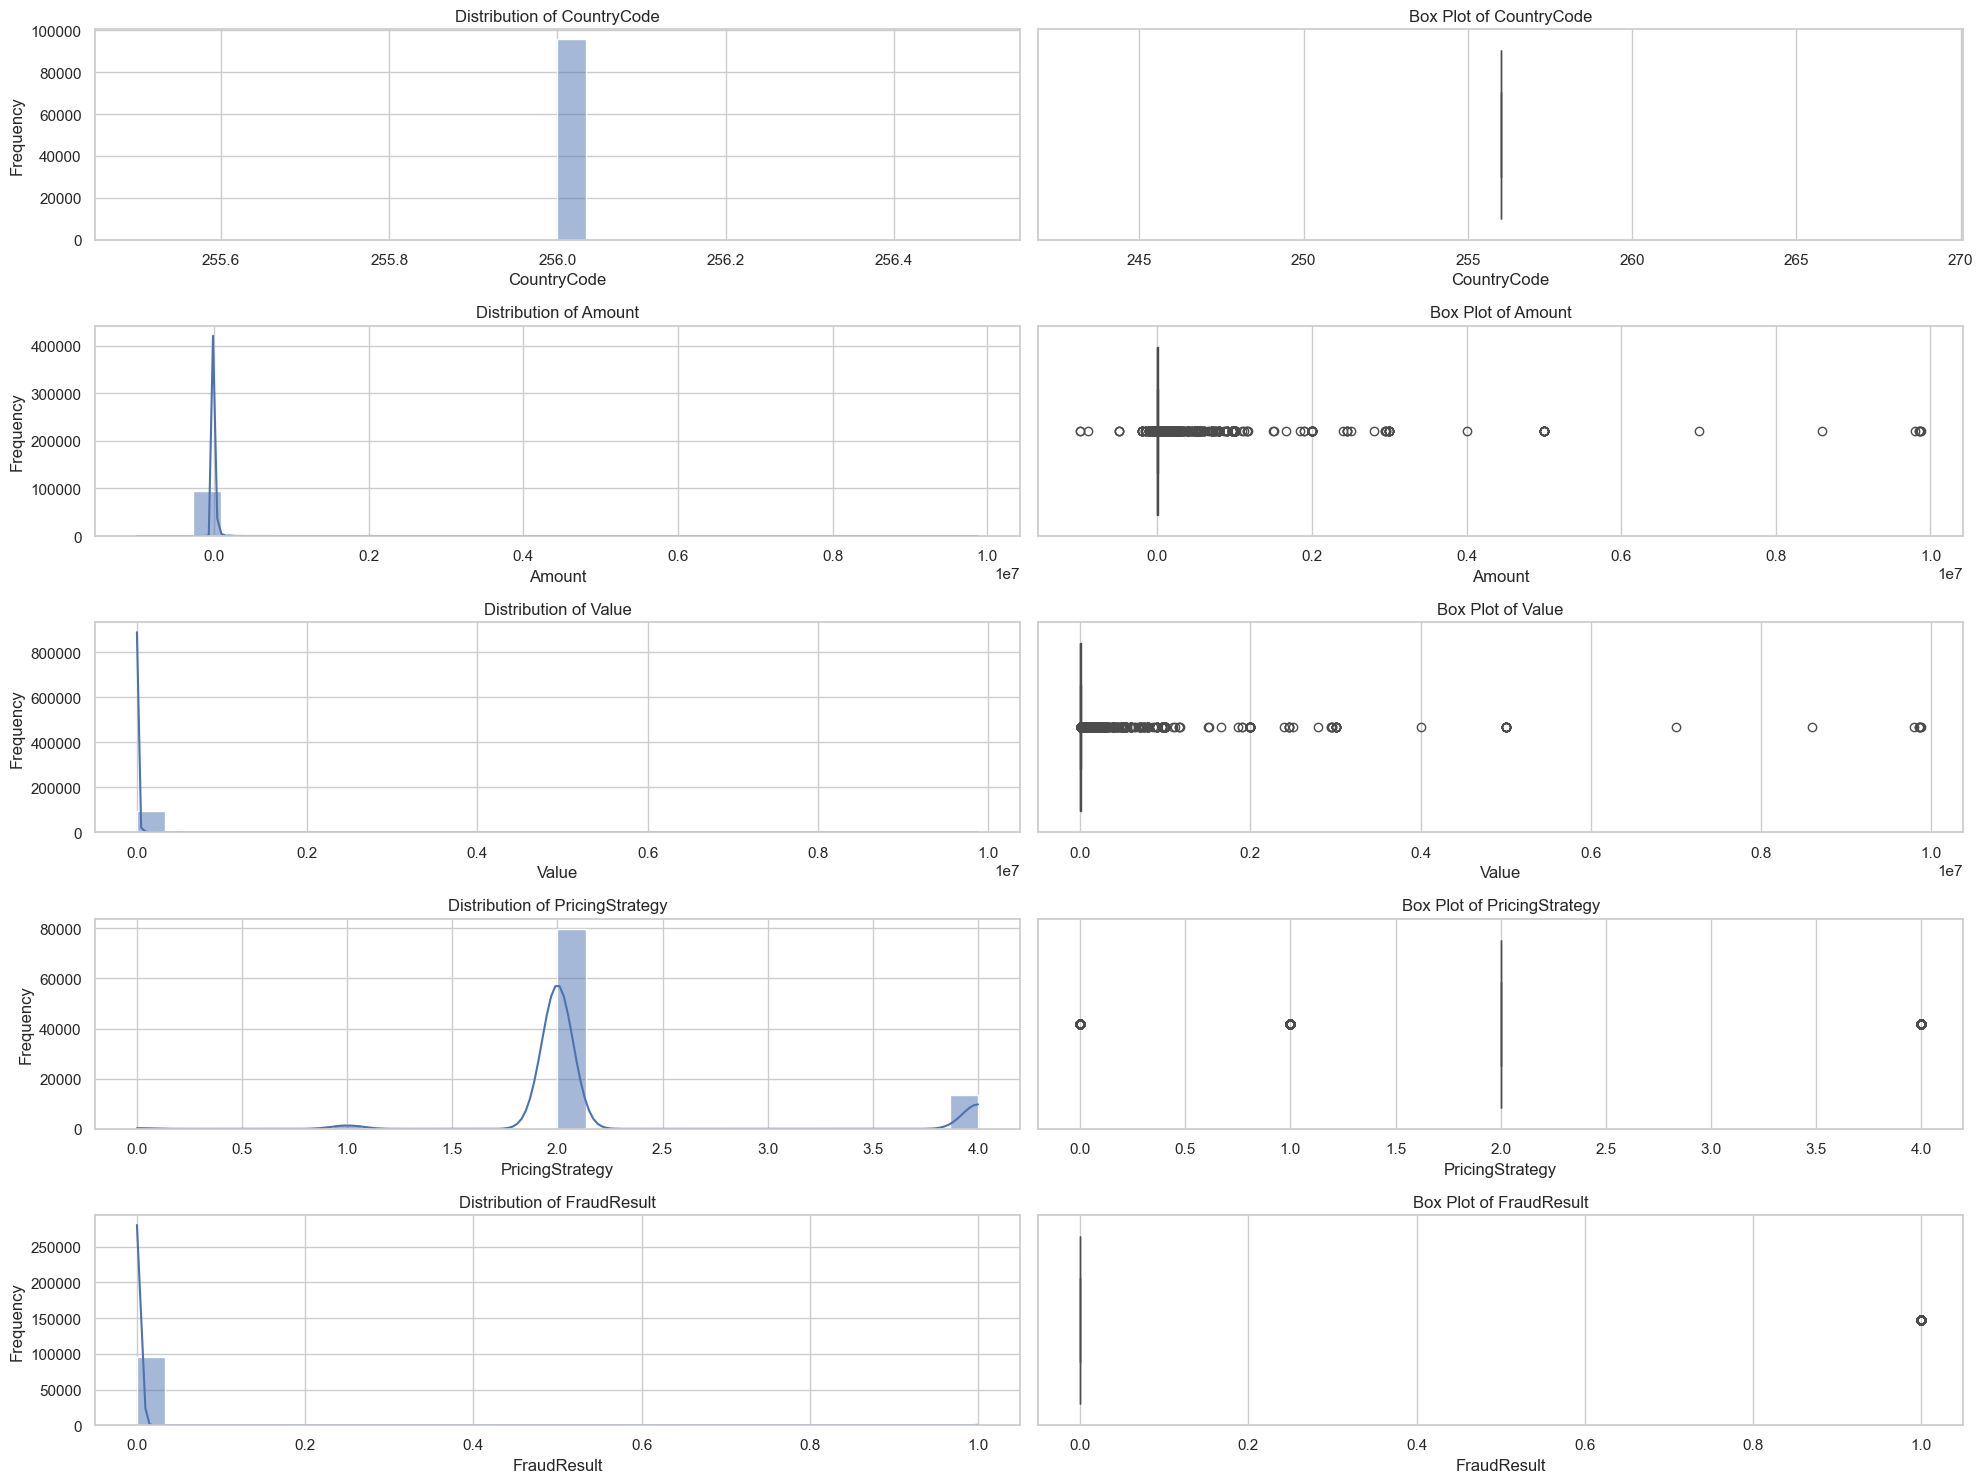

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for each numerical column
plt.figure(figsize=(20, 15))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i*2-1)
    sns.histplot(df[column], bins=30, kde=True)  # Histogram with Kernel Density Estimate
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(len(numerical_columns), 2, i*2)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### 4. Distribution of categorical variables


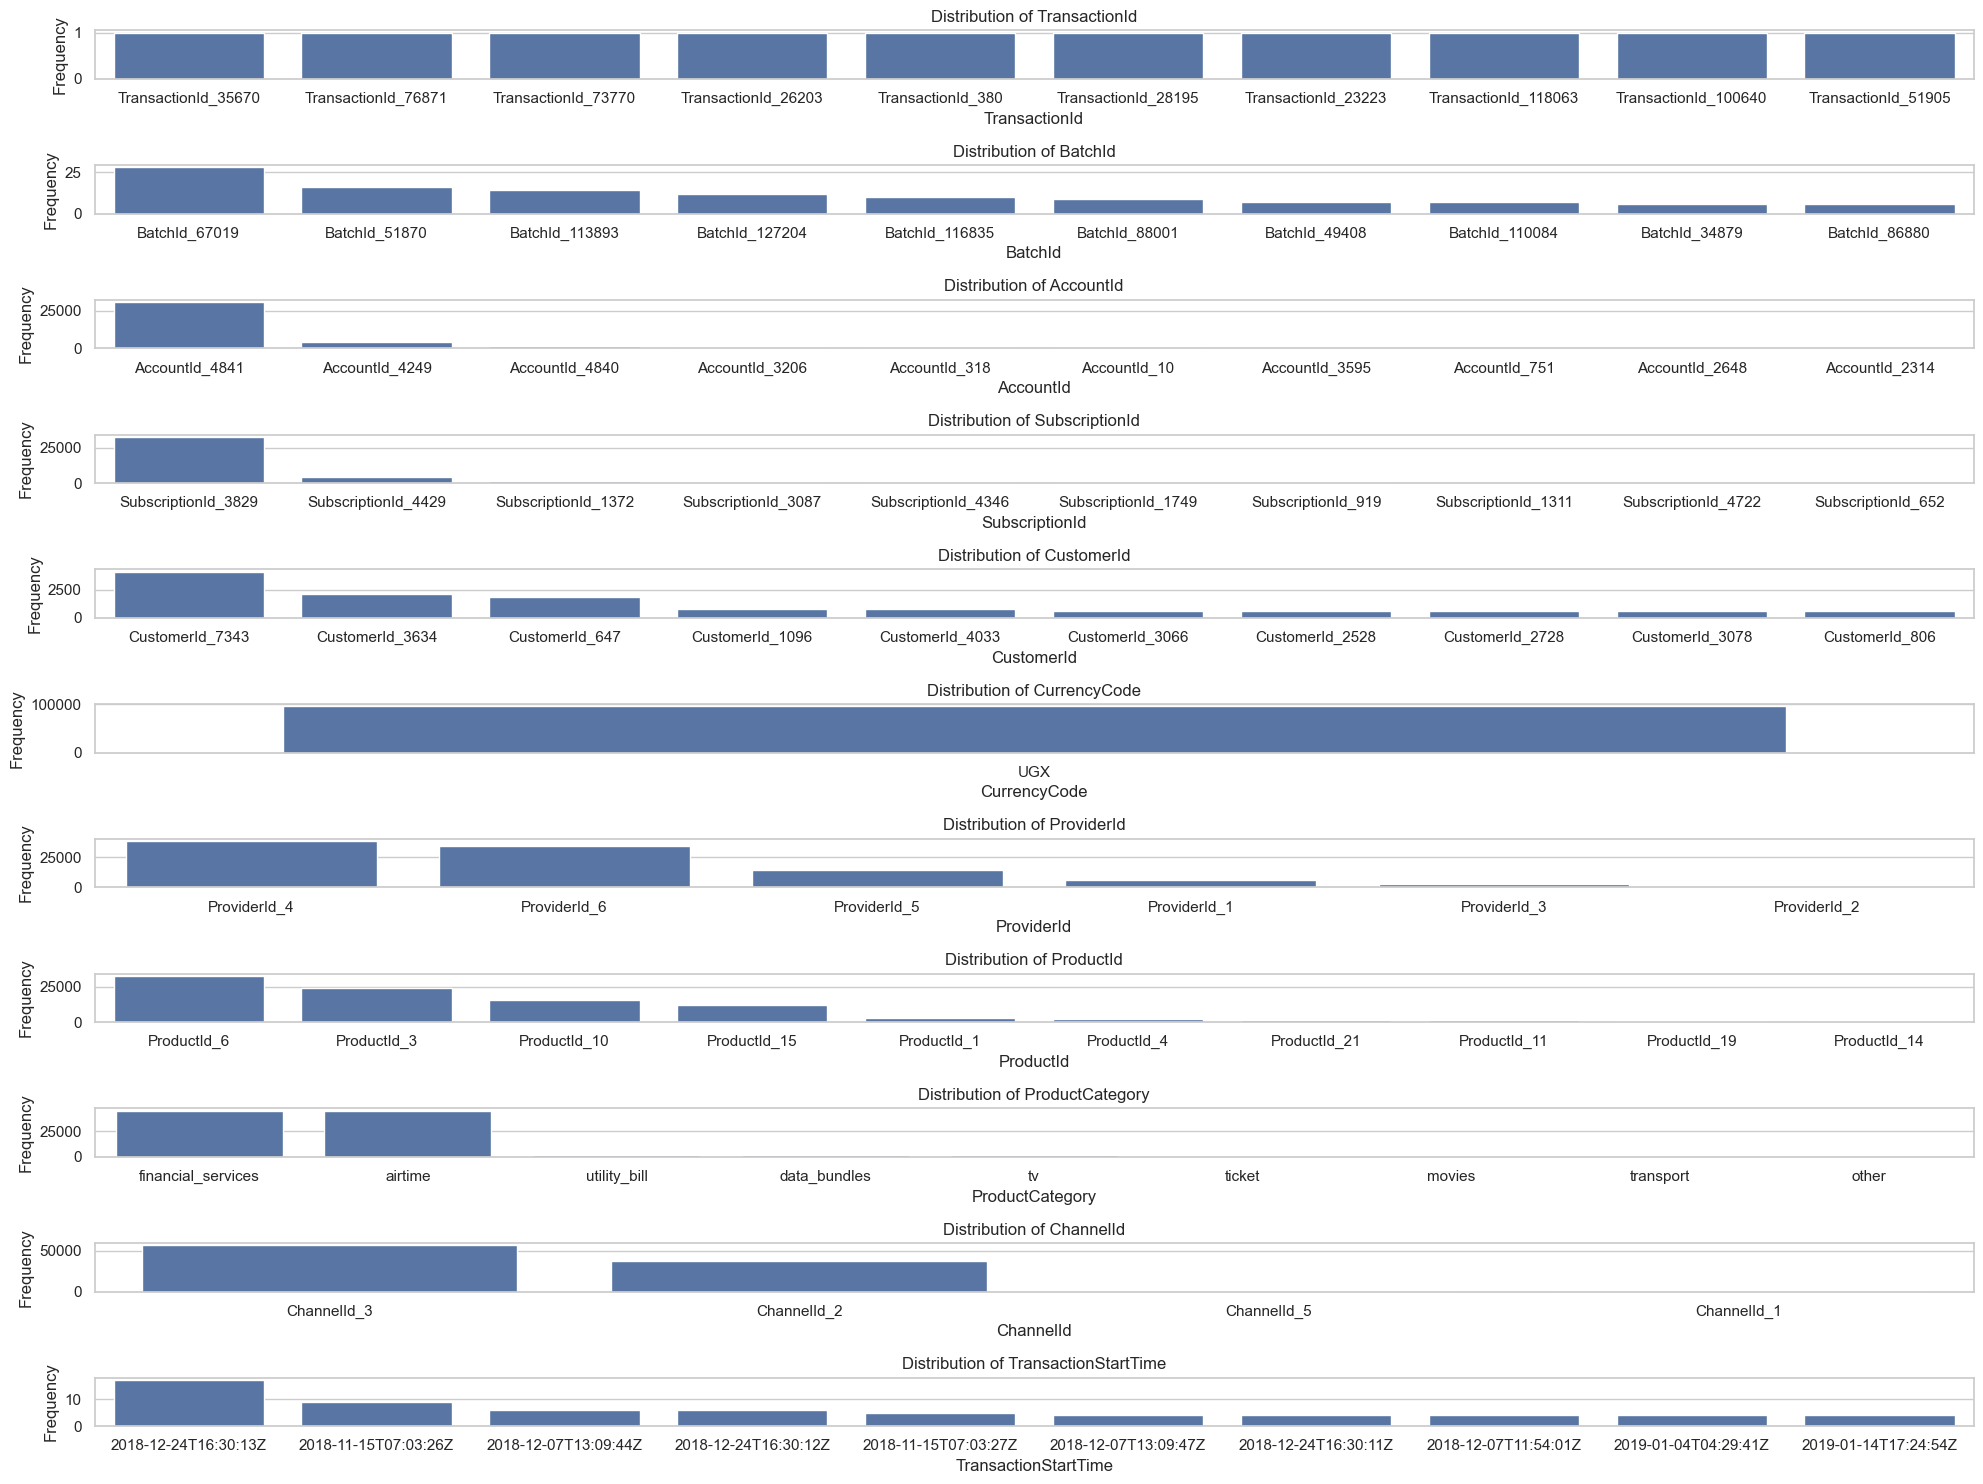

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for each categorical column
plt.figure(figsize=(20, 15))

# Create a dictionary to store the most common values for each column
most_common_values = {}

# Limit the number of categories to display (e.g., top 10)
max_categories = 10

# Store the most common values for each categorical column
for column in categorical_columns:
    most_common_values[column] = df[column].value_counts().nlargest(max_categories).index.tolist()

# Create count plots for each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=df, x=column, order=most_common_values[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### 5. Correaltion Analysis

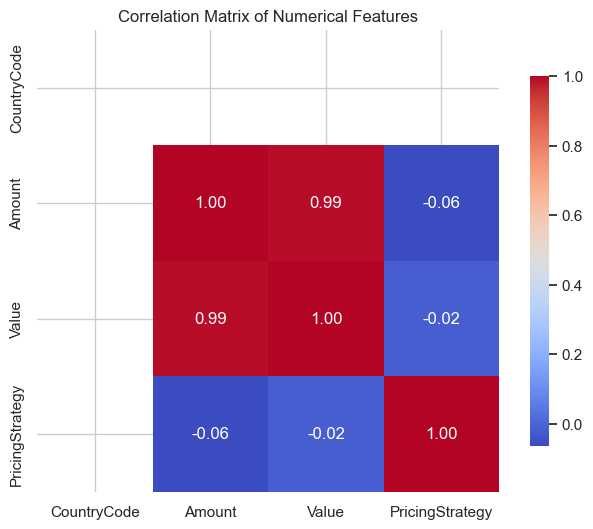

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select the numerical columns
numerical_columns = ['CountryCode', 'Amount', 'Value', 'PricingStrategy']
df_numerical = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### 6. Identifying Missing Values

In [8]:
import pandas as pd


# Step 1: Identify missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine the results into a DataFrame for better visualization
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print("Missing Values in Each Column:")
print(missing_info[missing_info['Missing Values'] > 0])  # Display only columns with missing values

# Step 2: Analyze missing values and decide on imputation strategies
imputation_strategies = {}

for column in df.columns:
    if df[column].isnull().sum() > 0:  # Check for missing values
        if df[column].dtype == 'object':
            # For categorical variables, use mode or a placeholder string
            imputation_strategies[column] = 'Mode or Placeholder'
        elif df[column].dtype in ['int64', 'float64']:
            # For numerical variables, use mean or median
            if df[column].isnull().sum() > len(df) * 0.05:  # More than 5% missing
                imputation_strategies[column] = 'Median'
            else:
                imputation_strategies[column] = 'Mean'
        else:
            imputation_strategies[column] = 'No action needed'

# Display the suggested imputation strategies
print("\nImputation Strategies:")
for col, strategy in imputation_strategies.items():
    print(f"{col}: {strategy}")

# Step 3: Impute missing values based on the chosen strategies
for column, strategy in imputation_strategies.items():
    if strategy == 'Mode or Placeholder':
        # Fill with mode (most frequent value) or a placeholder
        df[column].fillna(df[column].mode()[0], inplace=True)  # or df[column].fillna('Missing', inplace=True)
    elif strategy == 'Mean':
        df[column].fillna(df[column].mean(), inplace=True)
    elif strategy == 'Median':
        df[column].fillna(df[column].median(), inplace=True)

# Verify if missing values have been imputed
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values in Each Column:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []

Imputation Strategies:

Missing Values After Imputation:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [9]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


#### 7. Outlier Detection

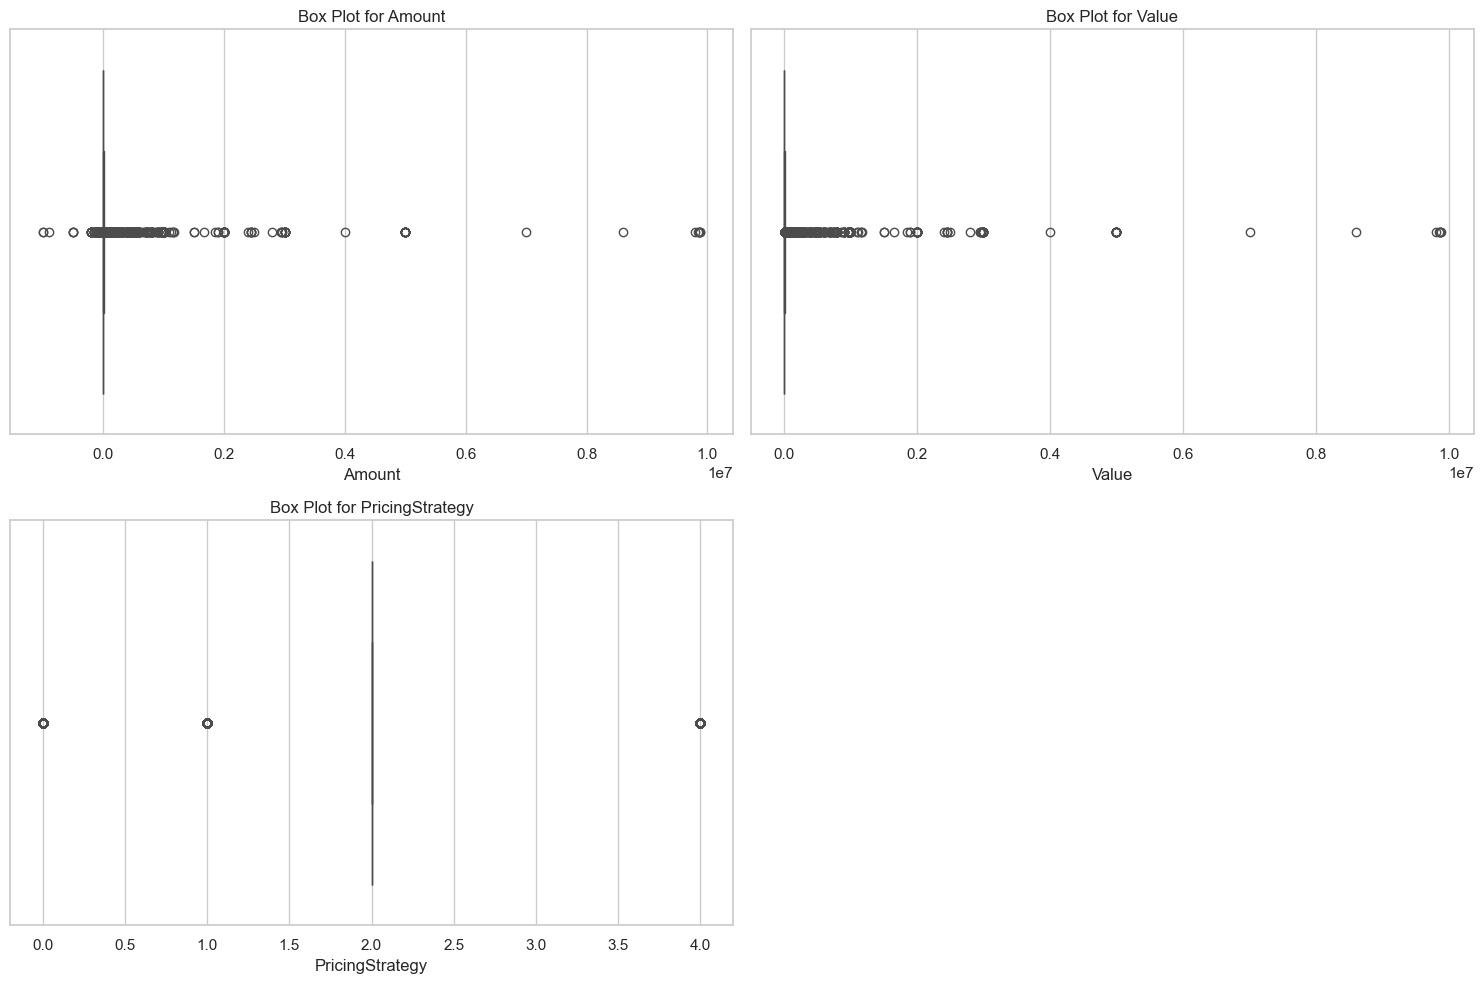

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# List of numerical columns to analyze for outliers
numerical_columns = ['Amount', 'Value', 'PricingStrategy']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for each numerical column
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Adjust the number of rows and columns based on the number of numerical columns
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Remove the outliers which exist in the columns **Value** and **Amount**.

In [12]:
import pandas as pd

# Define the columns to check for outliers
columns_to_check = ['Value', 'Amount']

# Initialize an empty dictionary to hold the count of outliers
outlier_counts = {}

# Calculate the number of outliers before removal
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Count outliers
    outlier_counts[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Display outlier counts before removal
print("Outlier counts before removal:")
print(outlier_counts)

# Remove outliers using the calculated bounds
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Calculate the number of outliers after removal
outlier_counts_after = {}
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers after removal
    outlier_counts_after[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Display outlier counts after removal
print("\nOutlier counts after removal:")
print(outlier_counts_after)

# Display the shape of the DataFrame before and after removing outliers
print(f"\nOriginal DataFrame shape: {len(df) + sum(outlier_counts.values())}")
print(f"DataFrame shape after removing outliers: {len(df)}")


Outlier counts before removal:
{'Value': 9021, 'Amount': 24441}

Outlier counts after removal:
{'Value': 7749, 'Amount': 8244}

Original DataFrame shape: 103422
DataFrame shape after removing outliers: 69960


Lastly, we need to save the new data frame for further analysis into new .csv file in the Data directory.

In [14]:
# Assuming 'df_cleaned' is your cleaned DataFrame
output_file_path = '../notebooks/data/cleaned_dataset.csv'  # Specify the desired file name

# Save the cleaned DataFrame to a CSV file
df.to_csv(output_file_path, index=False)
print(f"Cleaned dataset saved to {output_file_path}")



Cleaned dataset saved to ../notebooks/data/cleaned_dataset.csv
